In [5]:
from datetime import datetime

import mlflow
from mlflow.data.pandas_dataset import PandasDataset
from mlflow import MlflowClient
from mlflow.entities import ViewType

import os
import sys
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score

path_to_analysis = Path(os.getcwd()).parent / 'Analysis'
sys.path.append(str(path_to_analysis))
from dataPrep import Config, FeaturedData, VizualisedData

In [2]:
config = Config.dict_config
featured_data = FeaturedData(**config)

Pfad zur CSV-Datei: sickness_table.csv erstellt.
Daten bereinigt und in DataFrame umgewandelt.
Daten transformiert
Features hinzugefügt


#### Stationäre Anzahl an Notrufen am gleichen Wochentag vor 52 Wochen

In [16]:
df = featured_data.vor_364()
df[['calls_reg_act_diff', 'calls_rad_vor_364']]

,calls_reg_act_diff,calls_rad_vor_364
date,,
2017-03-31,791,1095.0
2017-04-01,2169,1466.0
2017-04-02,-976,1026.0
2017-04-03,2562,-19.0
2017-04-04,1715,171.0
...,...,...
2019-05-23,-230,584.0
2019-05-24,38,-659.0
2019-05-25,1069,-97.0


In [4]:
print(df.loc['2018-05-25', 'calls_reg_act_diff'])

-659


In [7]:
mse = mean_squared_error(df['calls_reg_act_diff'], df['calls_rad_vor_364'])
mse

1652635.4835025382

In [9]:
r2 = r2_score(df['calls_reg_act_diff'], df['calls_rad_vor_364'])
r2

-0.19083805643793683

#### Anzahl an Notrufen (stationäre) vs Benchmarkmodell-Vorhersage

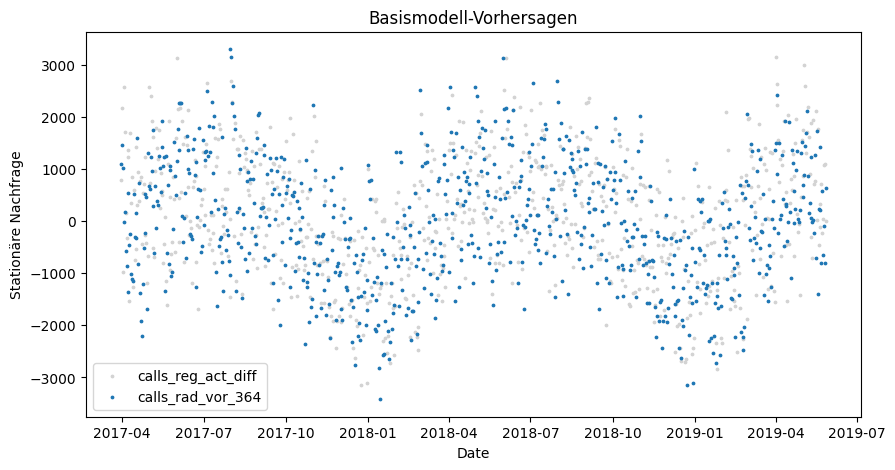

In [15]:
df['data'] = df.index
vizualisation_1 = VizualisedData(df)
vizualisation_1.scatter_compare('calls_reg_act_diff', 'calls_rad_vor_364', 'Basismodell-Vorhersagen')